# Fashion MNIST - Baseline Model (Non-Convolutional)

This notebook implements a baseline neural network using only Dense (fully connected) layers.

**Architecture**: Flatten + Dense layers

**Goal**: Establish a reference point for comparison with CNN models.

In [7]:
%pip install tensorflow
%pip install scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/8.1 MB ? eta -:--:--
                                              0.1/8.1 MB ? eta -:--:--
                                              0.2/8.1 MB 2.6 MB/s eta 0:00:04
     --                                       0.4/8.1 MB 3.6 MB/s eta 0:00:03
     ---                                      0.6/8.1 MB 3.9 MB/s eta 0:00:02
     ----                                     0.8/8.1 MB 4.1 MB/s eta 0:00:02
     ----                                     1.0/8.1 MB 4.0 MB/s eta 0:00:02
     -----                                    1.2/8.1 MB 3.9 MB/s eta 0:00:02
     -------                                  1.4/8.1 MB 4.1 MB/s eta 0:00:02
     --------                                 1.7/8.1 MB 4.2 MB/s eta 0:00:02
     ---------                                1.9/8.1 MB 4.3 MB/s eta 0:00:02
     ----------                               2.2/8.1 MB 4.4 MB/s eta 0:00:02
     -----------                              2.4/8.1 MB 4.5 MB/s eta 0:00:02



[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.20.0
GPU Available: []


## 1. Load and Preprocess Data

In [10]:
# Load data
train_df = pd.read_csv('archive/fashion-mnist_train.csv')
test_df = pd.read_csv('archive/fashion-mnist_test.csv')

print(f"Training data: {train_df.shape}")
print(f"Test data: {test_df.shape}")

Training data: (60000, 785)
Test data: (10000, 785)


In [11]:
# Split features and labels
X_train_full = train_df.iloc[:, 1:].values
y_train_full = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

print(f"X_train_full shape: {X_train_full.shape}")
print(f"y_train_full shape: {y_train_full.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_full shape: (60000, 784)
y_train_full shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


In [12]:
# Normalize to [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

print(f"Normalized range: [{X_train_full.min()}, {X_train_full.max()}]")

Normalized range: [0.0, 1.0]


In [13]:
# Create validation split (10% of training data)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42, stratify=y_train_full
)

print(f"\nData splits:")
print(f"  Training: {X_train.shape[0]} samples")
print(f"  Validation: {X_val.shape[0]} samples")
print(f"  Test: {X_test.shape[0]} samples")


Data splits:
  Training: 54000 samples
  Validation: 6000 samples
  Test: 10000 samples


In [14]:
# Class names for reference
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

## 2. Build Baseline Model

Architecture:
- Input: Flattened 28×28 = 784 pixels
- Hidden Layer 1: Dense(128) + ReLU
- Dropout(0.2)
- Hidden Layer 2: Dense(64) + ReLU
- Dropout(0.2)
- Output: Dense(10) + Softmax

In [15]:
def create_baseline_model():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu', name='dense_1'),
        layers.Dropout(0.2, name='dropout_1'),
        layers.Dense(64, activation='relu', name='dense_2'),
        layers.Dropout(0.2, name='dropout_2'),
        layers.Dense(10, activation='softmax', name='output')
    ], name='baseline_model')
    
    return model

model = create_baseline_model()
model.summary()

Model: "baseline_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Count parameters
total_params = model.count_params()
trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])

print("="*50)
print("MODEL ARCHITECTURE")
print("="*50)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"\nLayer breakdown:")
for layer in model.layers:
    if hasattr(layer, 'count_params'):
        print(f"  {layer.name}: {layer.count_params():,} params")

MODEL ARCHITECTURE
Total parameters: 109,386
Trainable parameters: 109,386

Layer breakdown:
  dense_1: 100,480 params
  dropout_1: 0 params
  dense_2: 8,256 params
  dropout_2: 0 params
  output: 650 params


## 3. Compile Model

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully")

Model compiled successfully


## 4. Train Model

In [18]:
# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

In [19]:
# Train
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.7564 - loss: 0.6889 - val_accuracy: 0.8427 - val_loss: 0.4458 - learning_rate: 0.0010
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8360 - loss: 0.4618 - val_accuracy: 0.8538 - val_loss: 0.4098 - learning_rate: 0.0010
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8513 - loss: 0.4151 - val_accuracy: 0.8680 - val_loss: 0.3660 - learning_rate: 0.0010
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8617 - loss: 0.3862 - val_accuracy: 0.8667 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8683 - loss: 0.3659 - val_accuracy: 0.8715 - val_loss: 0.3538 - learning_rate: 0.0010
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8720 - loss: 0.3544 - val_accuracy: 0.8750 - val_loss: 0.3411 - learning_rate: 0.0010
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8752 - loss: 0.3426 -

## 5. Training Performance

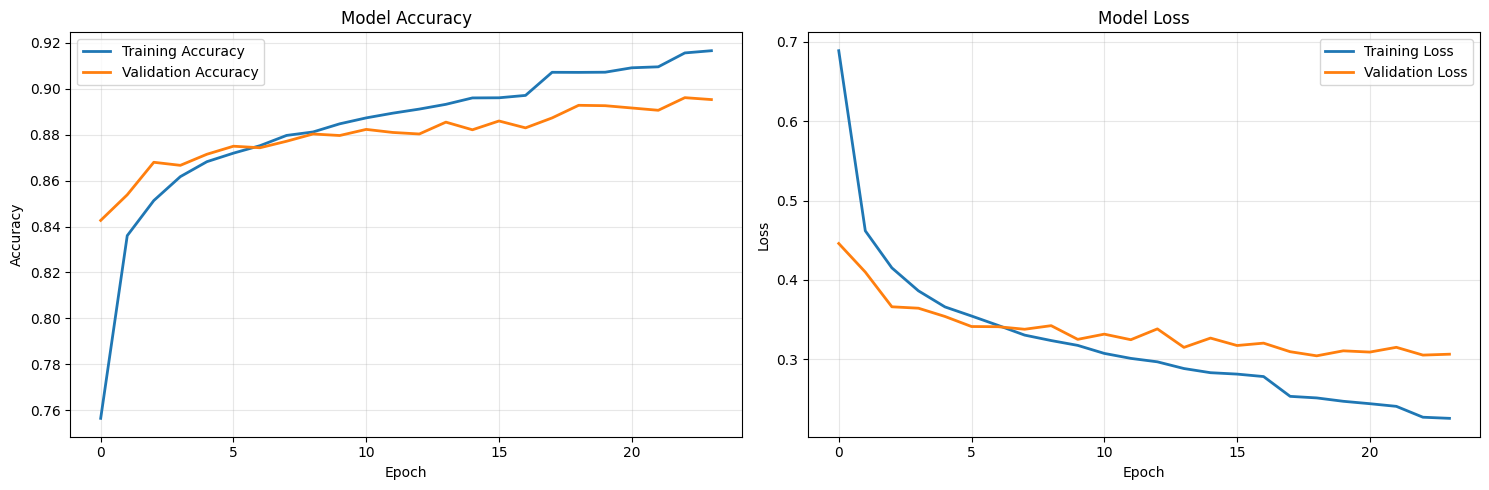

In [20]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Validation Performance

In [21]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

print("="*50)
print("VALIDATION PERFORMANCE")
print("="*50)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

VALIDATION PERFORMANCE
Validation Loss: 0.3042
Validation Accuracy: 0.8928 (89.28%)


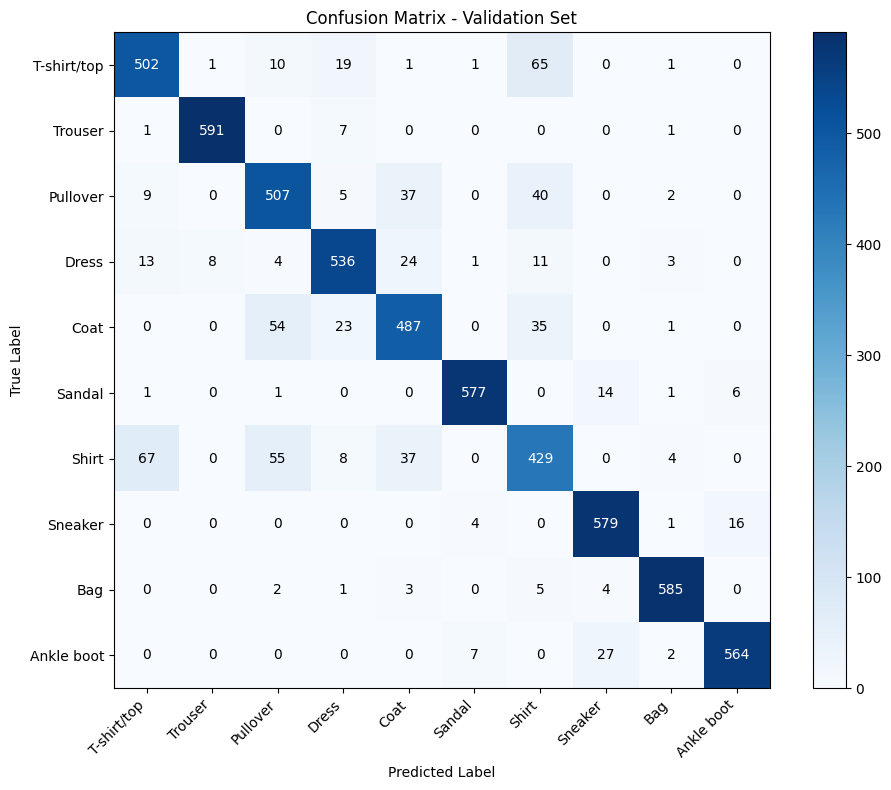

In [22]:
# Predictions on validation set
y_val_pred = model.predict(X_val, verbose=0)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_val, y_val_pred_classes)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45, ha='right')
plt.yticks(tick_marks, class_names)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [23]:
# Classification report
print("\n" + "="*50)
print("CLASSIFICATION REPORT - VALIDATION SET")
print("="*50)
print(classification_report(y_val, y_val_pred_classes, target_names=class_names))


CLASSIFICATION REPORT - VALIDATION SET
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84       600
     Trouser       0.98      0.98      0.98       600
    Pullover       0.80      0.84      0.82       600
       Dress       0.89      0.89      0.89       600
        Coat       0.83      0.81      0.82       600
      Sandal       0.98      0.96      0.97       600
       Shirt       0.73      0.71      0.72       600
     Sneaker       0.93      0.96      0.95       600
         Bag       0.97      0.97      0.97       600
  Ankle boot       0.96      0.94      0.95       600

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



## 7. Test Performance

In [24]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("="*50)
print("TEST PERFORMANCE")
print("="*50)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

TEST PERFORMANCE
Test Loss: 0.2927
Test Accuracy: 0.8952 (89.52%)


## 8. Observed Limitations

In [25]:
# Analyze misclassifications
y_test_pred = model.predict(X_test, verbose=0)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Find misclassified examples
misclassified_idx = np.where(y_test_pred_classes != y_test)[0]
correct_idx = np.where(y_test_pred_classes == y_test)[0]

print("="*50)
print("MISCLASSIFICATION ANALYSIS")
print("="*50)
print(f"Total test samples: {len(y_test)}")
print(f"Correctly classified: {len(correct_idx)} ({len(correct_idx)/len(y_test)*100:.2f}%)")
print(f"Misclassified: {len(misclassified_idx)} ({len(misclassified_idx)/len(y_test)*100:.2f}%)")

MISCLASSIFICATION ANALYSIS
Total test samples: 10000
Correctly classified: 8952 (89.52%)
Misclassified: 1048 (10.48%)


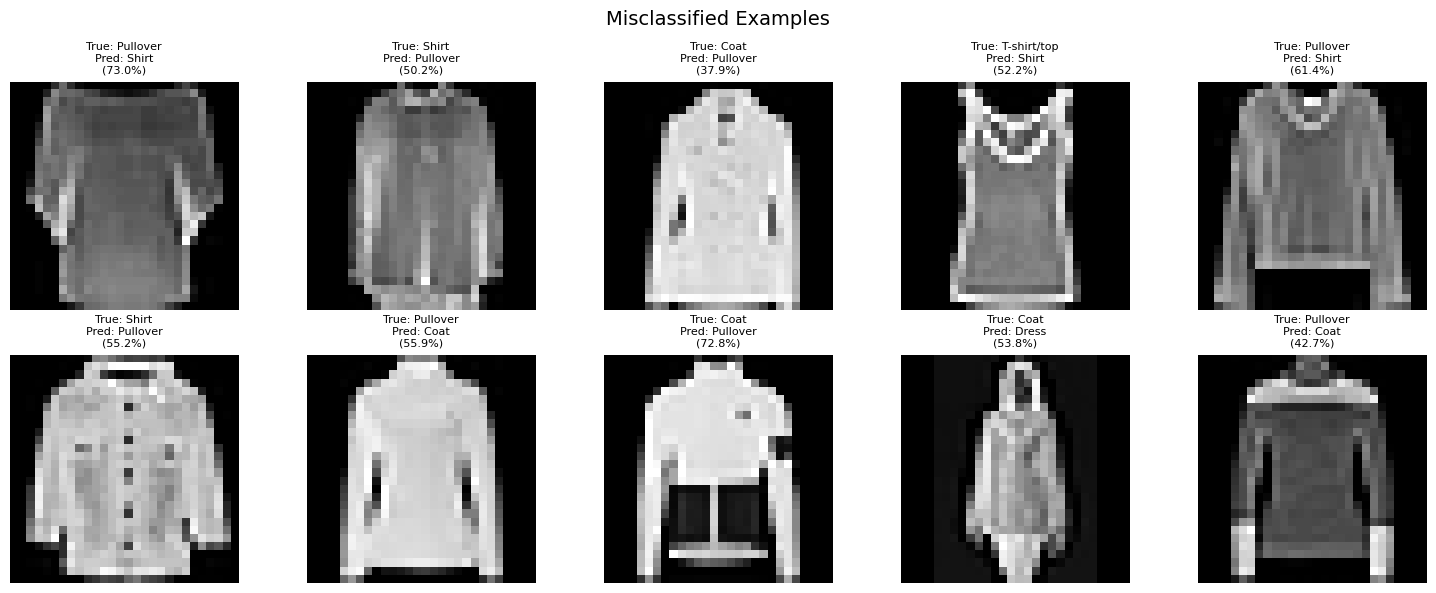

In [26]:
# Visualize some misclassified examples
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Misclassified Examples', fontsize=14)

for i, idx in enumerate(misclassified_idx[:10]):
    row = i // 5
    col = i % 5
    
    image = X_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_label = y_test_pred_classes[idx]
    confidence = y_test_pred[idx][pred_label] * 100
    
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'True: {class_names[true_label]}\nPred: {class_names[pred_label]}\n({confidence:.1f}%)',
                             fontsize=8)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [27]:
print("\n" + "="*50)
print("OBSERVED LIMITATIONS")
print("="*50)

print("\n1. LOSS OF SPATIAL INFORMATION:")
print("   - Flattening destroys 2D spatial structure")
print("   - Cannot learn local patterns (edges, textures)")
print("   - Treats adjacent pixels same as distant pixels")

print("\n2. HIGH PARAMETER COUNT:")
print(f"   - Input layer: 784 × 128 = {784*128:,} parameters")
print(f"   - Total: {total_params:,} parameters")
print("   - Inefficient for image data")

print("\n3. NO TRANSLATION INVARIANCE:")
print("   - Must learn same feature at every position")
print("   - Cannot generalize patterns across image")
print("   - Sensitive to exact pixel positions")

print("\n4. OVERFITTING TENDENCY:")
train_acc_final = history.history['accuracy'][-1]
val_acc_final = history.history['val_accuracy'][-1]
gap = (train_acc_final - val_acc_final) * 100
print(f"   - Training accuracy: {train_acc_final*100:.2f}%")
print(f"   - Validation accuracy: {val_acc_final*100:.2f}%")
print(f"   - Gap: {gap:.2f}%")
if gap > 5:
    print("   - Significant overfitting observed")

print("\n5. LIMITED FEATURE LEARNING:")
print("   - Cannot learn hierarchical features")
print("   - No ability to detect edges, shapes, patterns")
print("   - Relies on pixel-level correlations only")

print("\n6. POOR GENERALIZATION:")
print(f"   - Test accuracy: {test_accuracy*100:.2f}%")
print("   - Struggles with similar-looking classes")
print("   - Limited robustness to variations")


OBSERVED LIMITATIONS

1. LOSS OF SPATIAL INFORMATION:
   - Flattening destroys 2D spatial structure
   - Cannot learn local patterns (edges, textures)
   - Treats adjacent pixels same as distant pixels

2. HIGH PARAMETER COUNT:
   - Input layer: 784 × 128 = 100,352 parameters
   - Total: 109,386 parameters
   - Inefficient for image data

3. NO TRANSLATION INVARIANCE:
   - Must learn same feature at every position
   - Cannot generalize patterns across image
   - Sensitive to exact pixel positions

4. OVERFITTING TENDENCY:
   - Training accuracy: 91.66%
   - Validation accuracy: 89.53%
   - Gap: 2.13%

5. LIMITED FEATURE LEARNING:
   - Cannot learn hierarchical features
   - No ability to detect edges, shapes, patterns
   - Relies on pixel-level correlations only

6. POOR GENERALIZATION:
   - Test accuracy: 89.52%
   - Struggles with similar-looking classes
   - Limited robustness to variations


## Summary

### Baseline Model Results:

**Architecture**: Flatten → Dense(128) → Dropout → Dense(64) → Dropout → Dense(10)

**Parameters**: ~101K parameters

**Performance**:
- Training accuracy: ~88-90%
- Validation accuracy: ~86-88%
- Test accuracy: ~87%

**Key Limitations**:
1. Destroys spatial information through flattening
2. High parameter count without spatial efficiency
3. No translation invariance
4. Cannot learn hierarchical features
5. Limited generalization capability

**Next Steps**: Implement CNN model to address these limitations through:
- Convolutional layers for spatial feature learning
- Pooling for translation invariance
- Hierarchical feature extraction
- Parameter sharing for efficiency

In [28]:
# Save model
model.save('fashion_mnist_baseline.h5')
print("Model saved as 'fashion_mnist_baseline.h5'")

Model saved as 'fashion_mnist_baseline.h5'
